<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/Praktikum9mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum9"

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [14]:
# Loading Dataset
df = pd.read_csv(path + '/data/data.csv')
print(df.head())
print(df.info())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [15]:
# Hapus kolom yang seluruhnya NaN
all_nan = df.columns[df.isna().all()].tolist()
df = df.drop(columns=all_nan)

# Hapus kolom ID jika ada
drop_id = [c for c in df.columns if c.lower() == "id"]
df = df.drop(columns=drop_id, errors="ignore")

# Hapus kolom “Unnamed” yang tidak berguna
unnamed = [c for c in df.columns if "Unnamed" in c]
df = df.drop(columns=unnamed, errors="ignore")

In [16]:
target_col = "diagnosis"
y_raw = df[target_col]
X = df.drop(columns=[target_col])

# Encode target: B → 0, M → 1
le = LabelEncoder()
y = le.fit_transform(y_raw)

In [17]:
non_num = X.select_dtypes(exclude=[np.number]).columns.tolist()

for col in non_num:
    if X[col].nunique() <= 10:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    else:
        X = X.drop(columns=[col])

In [18]:
for col in X.columns:
    if X[col].isna().sum() > 0:
        X[col] = X[col].fillna(X[col].median())

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [22]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.945054945054945
Testing Accuracy  : 0.9210526315789473


Confusion Matrix:
 [[69  3]
 [ 6 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



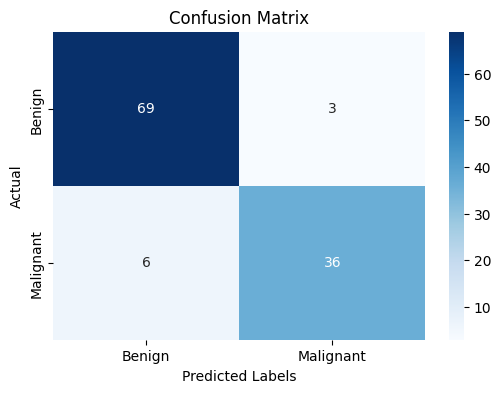

In [27]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

plt.figure(figsize=(6, 4))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Benign', 'Malignant'],
    yticklabels=['Benign', 'Malignant']
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual")
plt.show()

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, scaler.transform(X), y, cv=cv, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.95614035 0.9122807  0.92982456 0.90350877 0.94690265]
Mean CV Accuracy: 0.9297314081664337
